In [49]:
import numpy as np
import sys
sys.path.append('..')
from gp import GP
from kern import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [50]:
def obj_f(x):
    return np.sin(8*x) + 0.5*x

# Compare Kernel
    - Gauss
    - Matern3/2
    - Matern5/2
## Kernel Hyper parameter
    - lengthscale: 0.3
    - variance: 4

## construct gp model

In [51]:
rand_gen = np.random.RandomState(0)

x = np.arange(-1, 1, 0.01)
y = obj_f(x)

train_x = rand_gen.choice(x, 4, replace=False)
train_y = obj_f(train_x)

l = 0.3
v = 4

rbf = Rbf(1, length_scale=l, variance=v)
matern32 = Matern32(1, length_scale=l, variance=v)
matern52 = Matern52(1, length_scale=l, variance=v)

gp_rbf = GP(train_x[:, np.newaxis], train_y, rbf, seed=0)
gp_matern32 = GP(train_x[:, np.newaxis], train_y, matern32, seed=1)
gp_matern52 = GP(train_x[:, np.newaxis], train_y, matern52, seed=2)

## Prior sample

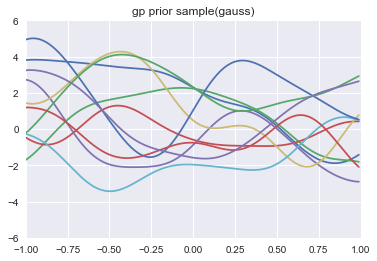

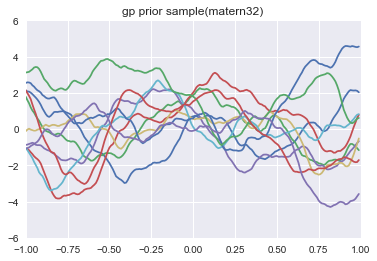

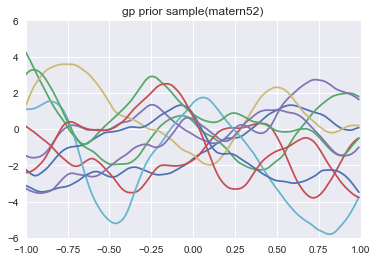

In [53]:
plt.title('gp prior sample(gauss)')
for _ in range(10):
    plt.plot(x, gp_rbf.prior_sampling(x[:, np.newaxis]))
plt.xlim([-1, 1])
plt.ylim([-6, 6])
plt.savefig('../image/gp-prior-gauss.png')
plt.show()

plt.title('gp prior sample(matern32)')
for _ in range(10):
    plt.plot(x, gp_matern32.prior_sampling(x[:, np.newaxis]))
plt.xlim([-1, 1])
plt.ylim([-6, 6])
plt.savefig('../image/gp-prior-matern32.png')
plt.show()

plt.title('gp prior sample(matern52)')
for _ in range(10):
    plt.plot(x, gp_matern52.prior_sampling(x[:, np.newaxis]))
plt.xlim([-1, 1])
plt.ylim([-6, 6])
plt.savefig('../image/gp-prior-matern52.png')
plt.show()

## Regression
### Objective function
$$
        f(x) = \sin(8x) + 0.5x
$$

Text(0.5,1,'objective function')

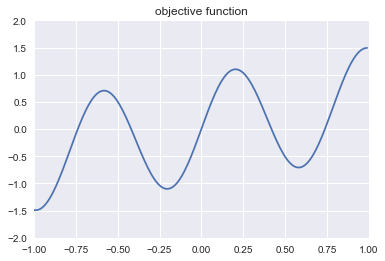

In [47]:
plt.plot(x, y)
plt.ylim([-2, 2])
plt.xlim([-1, 1])
plt.title('objective function')

### Predictive mean and variance

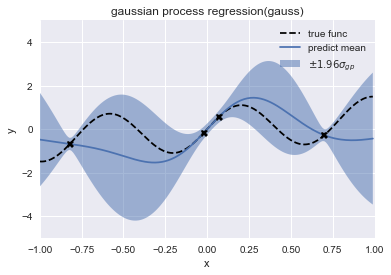

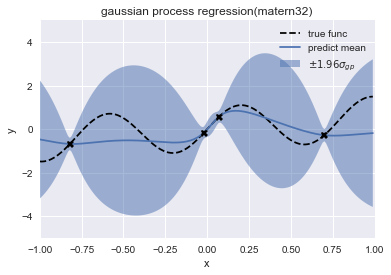

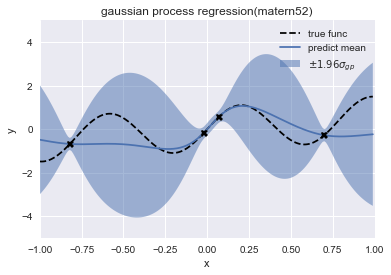

In [54]:
pmean_rbf, pvar_rbf = gp_rbf.predict(x[:, np.newaxis])
pmean_matern32, pvar_matern32 = gp_matern32.predict(x[:, np.newaxis])
pmean_matern52, pvar_matern52 = gp_matern52.predict(x[:, np.newaxis])

plt.plot(x, y, 'k--', label='true func')
plt.plot(x, pmean_rbf, label='predict mean')
plt.plot(train_x, train_y, 'kX')
plt.fill_between(x, pmean_rbf - 1.96*np.sqrt(pvar_rbf), pmean_rbf + 1.96*np.sqrt(pvar_rbf), alpha=0.5, label='$\pm1.96\sigma_{gp}$')
plt.ylim([-5, 5])
plt.xlim([-1, 1])
plt.title('gaussian process regression(gauss)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('../image/gp-posterior-gauss.png')
plt.show()

plt.plot(x, y, 'k--', label='true func')
plt.plot(x, pmean_matern32, label='predict mean')
plt.plot(train_x, train_y, 'kX')
plt.fill_between(x, pmean_matern32 - 1.96*np.sqrt(pvar_matern32), pmean_matern32 + 1.96*np.sqrt(pvar_matern32), alpha=0.5, label='$\pm1.96\sigma_{gp}$')
plt.ylim([-5, 5])
plt.xlim([-1, 1])
plt.title('gaussian process regression(matern32)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('../image/gp-posterior-matern32.png')
plt.show()

plt.plot(x, y, 'k--', label='true func')
plt.plot(x, pmean_matern52, label='predict mean')
plt.plot(train_x, train_y, 'kX')
plt.fill_between(x, pmean_matern52 - 1.96*np.sqrt(pvar_matern52), pmean_matern52 + 1.96*np.sqrt(pvar_matern52), alpha=0.5, label='$\pm1.96\sigma_{gp}$')
plt.ylim([-5, 5])
plt.xlim([-1, 1])
plt.title('gaussian process regression(matern52)')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../image/gp-posterior-matern52.png')
plt.legend()
plt.show()